# Problem 2

In [600]:
import numpy as np

In [601]:
#In fact, for convenience, it is H - I matrix
def householder(x):  #x is a first row of the matrix
    n = len(x)
    x[0] -= np.linalg.norm(x)*np.sign(x[0])
    v = x/np.linalg.norm(x)
    H = np.zeros((n,n)) - 2*np.outer(v,v)  
    return H


In [602]:
def HouseHolder_QR_decomposition(A):
    m = A.shape[0]
    n = A.shape[1]
    a = A.copy()[:,0]
    a = np.array(a)
    R = A.copy()
    Q = np.eye(m,m)
    t = np.amin([m-1,n])
    for j in xrange(0,t):
        Q_k = np.eye(m,m)
        a = R.copy()[j:,j,np.newaxis]
        Q_small = householder(a)
        Q_k[j:,j:] += Q_small[:,:]
        R = np.dot(Q_k,R)
        Q = Q.dot(Q_k.T)
    return Q,R    


#Test
m = 128
n = 100
A = 3*np.random.rand(m,n)
A = np.array(A)
Q,R = HouseHolder_QR_decomposition(A)

print np.linalg.norm(Q.dot(R) - A)
print np.linalg.norm(Q.T.dot(Q) - np.eye(len(Q)))


    

3.0776447535e-13
4.23625133656e-14


In [603]:
def Gramm_Schmidt(A):
    m = A.shape[0]
    n = A.shape[1]
    Q = np.zeros((m,n))
    Q[:,0] = A.copy()[:,0]/np.linalg.norm(A[:,0])
    for j in xrange(1,n):
        Q[:,j] = A.copy()[:,j]
        for i in xrange(j):
            Q[:,j] -= np.inner(A[:,j],Q[:,i])*Q[:,i]
        Q[:,j] = Q[:,j]/np.linalg.norm(Q[:,j])
    R = Q.T.dot(A)
    return Q,R 

#Test
m = 4
n = 4
A = 4*np.random.rand(m,n)
A = np.array(A)
Q,R = Gramm_Schmidt(A)
print np.linalg.norm(Q.dot(R) - A)
print np.linalg.norm(Q.T.dot(Q) - np.eye(n))
        
    

6.32851470564e-15
1.95065624627e-15


In [604]:
def modified_Gramm_Schmidt(A):
    n = A.shape[1]
    Q = A.copy()
    for j in xrange(n):
        for i in xrange(j):
            Q[:,j] -= np.inner(Q[:,j],Q[:,i])*(Q[:,i])
        Q[:,j] = Q[:,j]/np.linalg.norm(Q[:,j])
    R = Q.T.dot(A)
    return Q,R

#Test
m = 600
n = 300
A = 3*np.random.rand(m,n)
A = np.array(A)
Q,R = modified_Gramm_Schmidt(A)
print np.linalg.norm(Q.dot(R) - A)
print np.linalg.norm(Q.T.dot(Q) - np.eye(n))


2.87451072301e-12
1.46302059754e-14


In [605]:
dims = [5,10,20]
names = ['Householder','Modified G-S','G-S']
funcs = [HouseHolder_QR_decomposition,modified_Gramm_Schmidt,Gramm_Schmidt]
errors = {name:[] for name in names}
errors1 = {name:[] for name in names}

def measuring_orthogonality(n,func, *args, **kwargs):
    Q,R = func(*args, **kwargs)
    error = np.linalg.norm(Q.T.dot(Q) - np.eye(n))
    return error

for n in dims:
    H = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)] 
    #H = 4*np.random.rand(n,n)
    H = np.array(H)
    for name,func in zip(names,funcs):
        errors[name].append(measuring_orthogonality(n,func,H))
        
for n in dims:
    #H = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)] 
    H = 4*np.random.rand(n,n)
    H = np.array(H)
    for name,func in zip(names,funcs):
        errors1[name].append(measuring_orthogonality(n,func,H))

print errors

{'G-S': [6.8086297531862561e-09, 3.4635400612517251, 13.305301750473602], 'Householder': [9.7293091618384006e-16, 2.2347165732976642e-15, 4.6119849373559626e-15], 'Modified G-S': [1.2367810737481157e-11, 0.00019632828629472277, 2.3732955318141395]}


In [606]:
import matplotlib.pyplot as plt
%matplotlib inline 

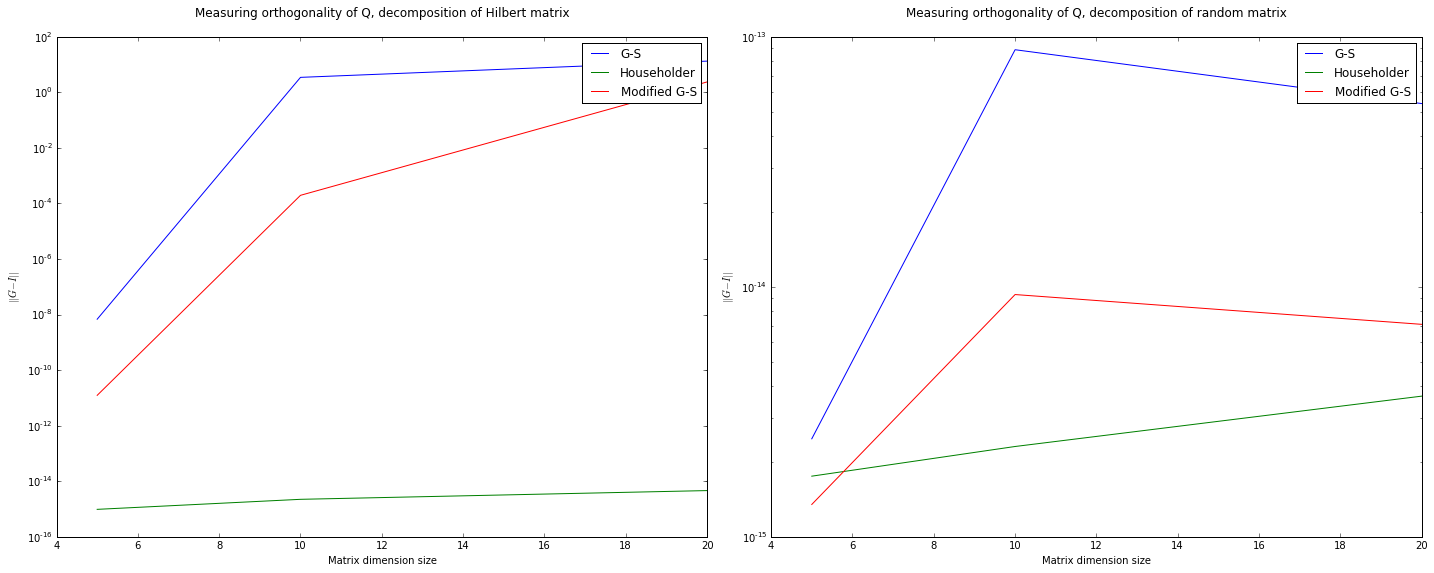

In [609]:
fig = plt.figure(figsize=(20,8))

ax0 = plt.subplot(121)
for name, values in errors.iteritems():
    plt.semilogy(dims, values, label=name)
    
plt.legend()
plt.title('Measuring orthogonality of Q, decomposition of Hilbert matrix', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('$||G - I||$')

ax1 = plt.subplot(122)
for name, values in errors1.iteritems():
    plt.semilogy(dims, values, label=name)
plt.legend()
plt.title('Measuring orthogonality of Q, decomposition of random matrix', y=1.03)
plt.xlabel('Matrix dimension size')
plt.ylabel('$||G - I||$')
fig.tight_layout()